In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_airport_dataset_enriched (1).csv to final_airport_dataset_enriched (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weather_meteo_by_airport.csv to weather_meteo_by_airport.csv


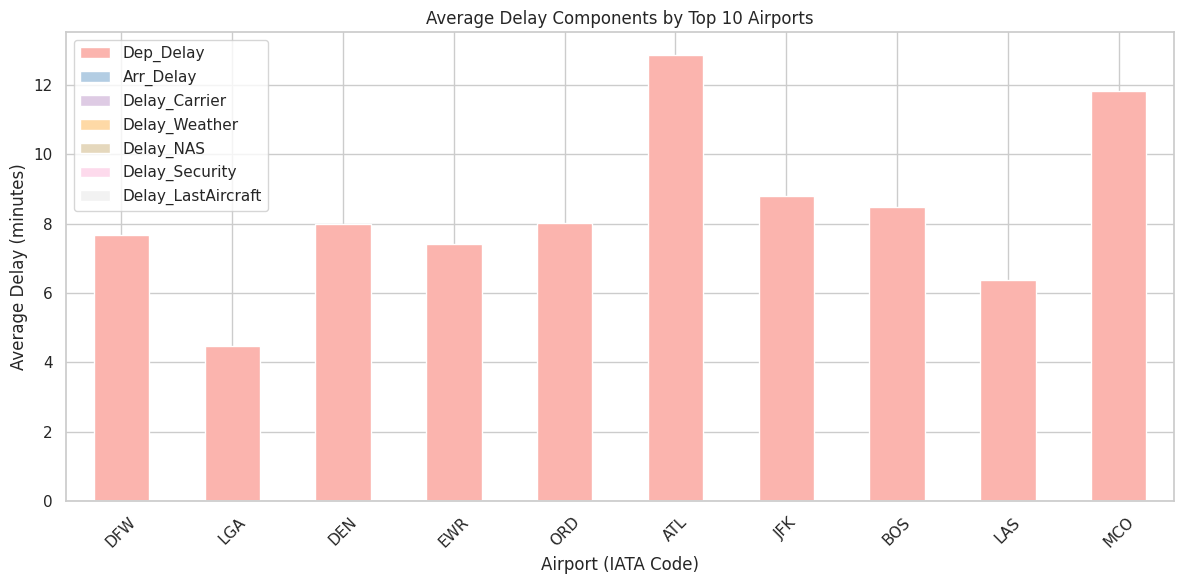

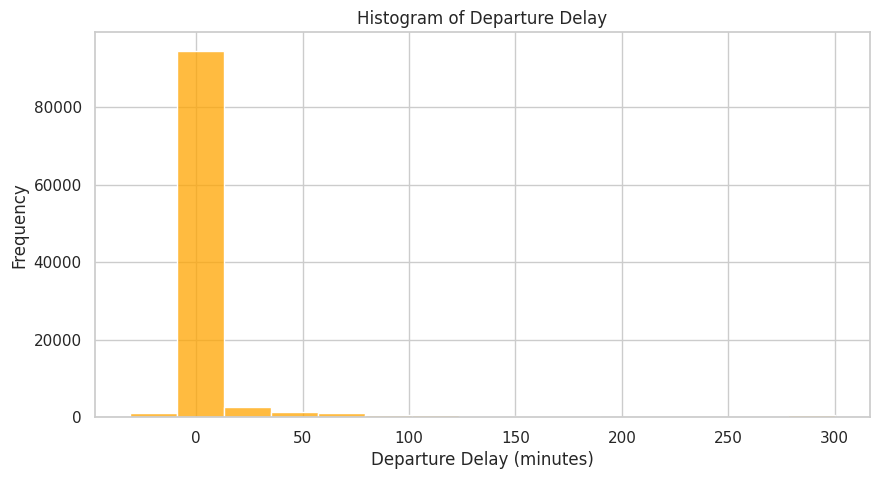

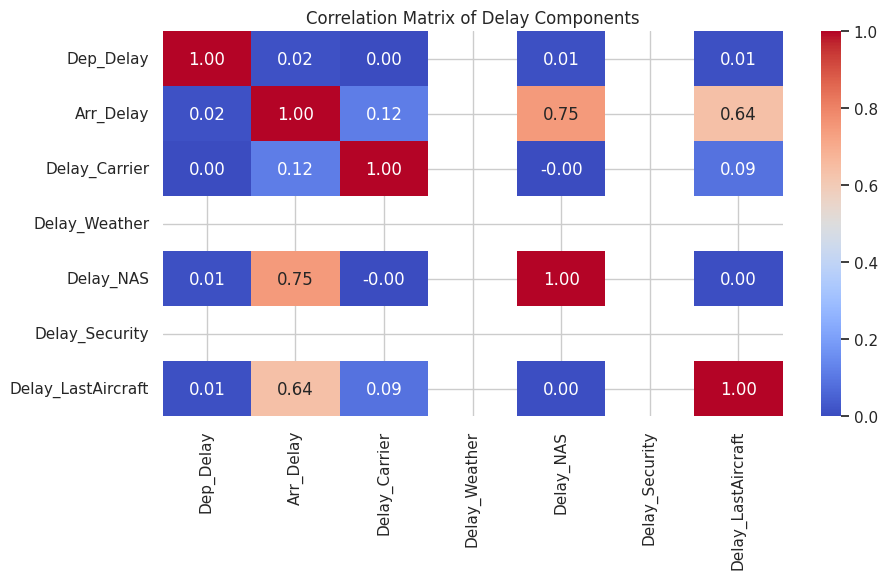

<ipython-input-7-1f0d37a2dcc4>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airports.values, y=top_airports.index, palette='Reds_r')


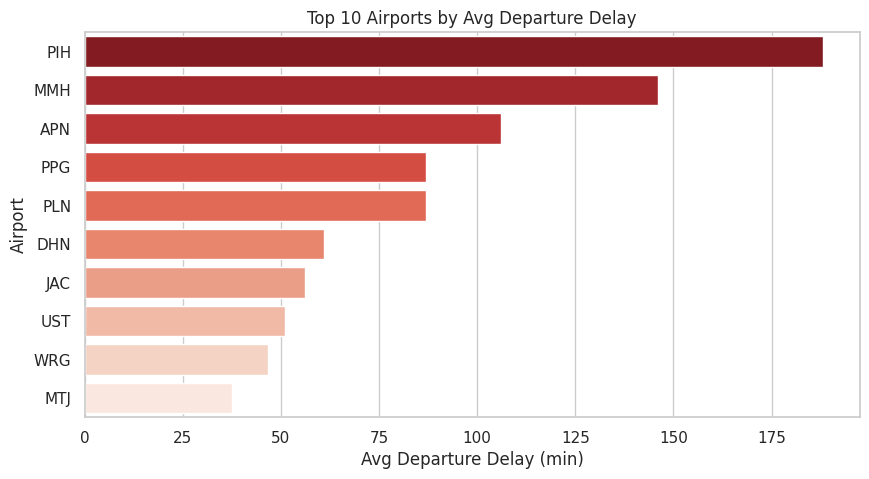

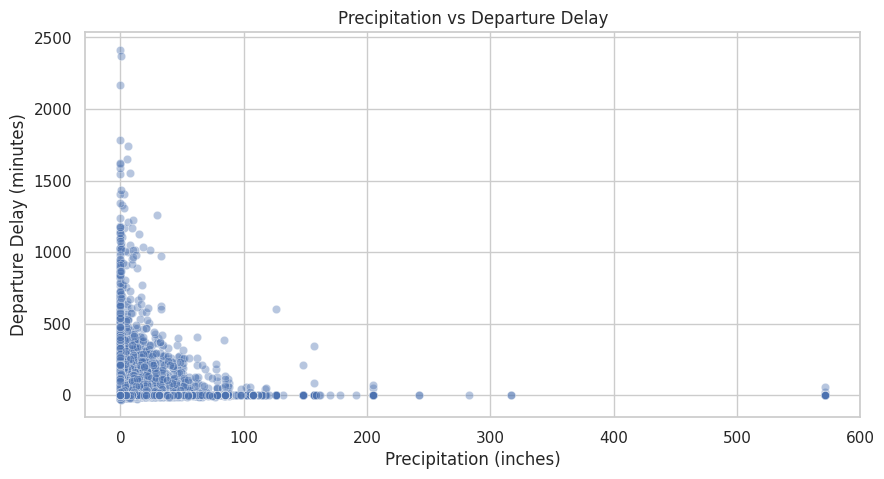

<ipython-input-7-1f0d37a2dcc4>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_extreme_airports.values, y=top_extreme_airports.index, palette="rocket")


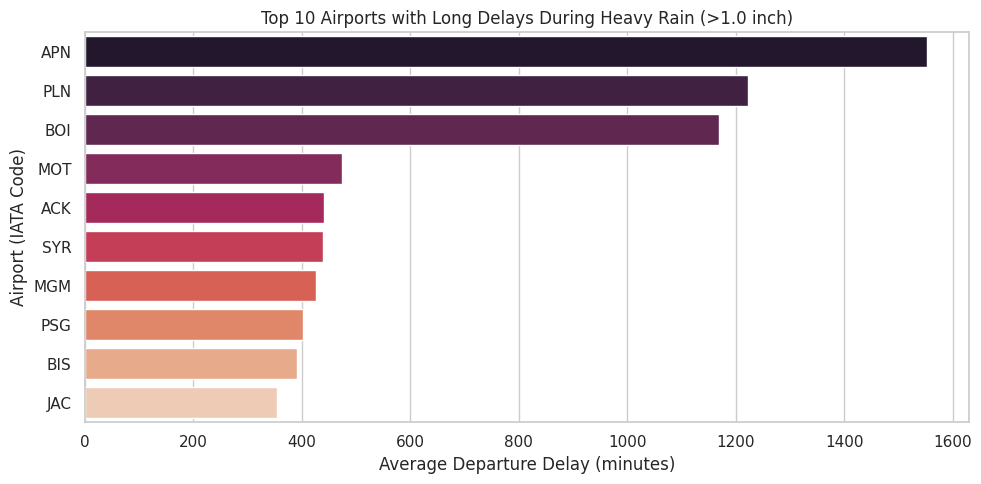

<ipython-input-7-1f0d37a2dcc4>:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delays.values, y=avg_delays.index, palette="Reds_r")


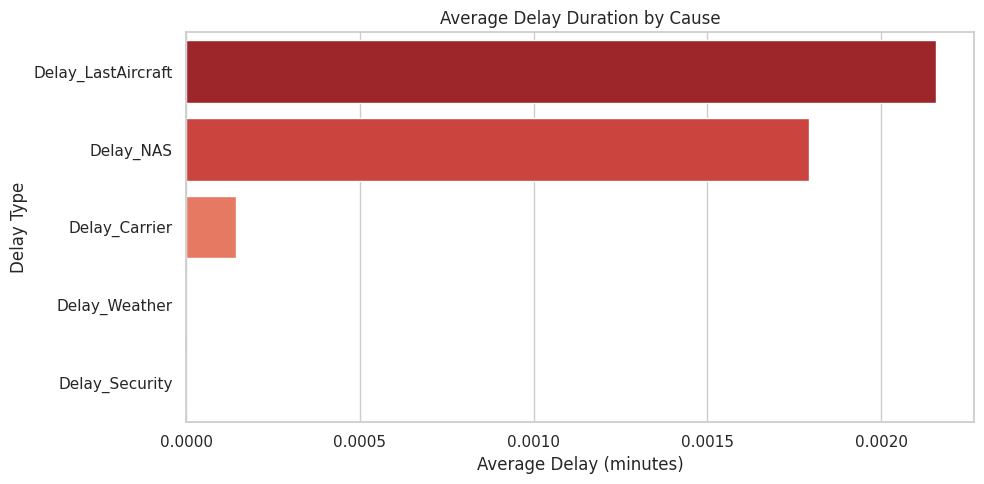

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Load the dataset
df = pd.read_csv("final_airport_dataset_enriched (1).csv")


delay_columns = [
    'Dep_Delay', 'Arr_Delay', 'Delay_Carrier', 'Delay_Weather',
    'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft'
]
for col in delay_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

# Gecikme türlerini havalimanına göre grupla ve ortalamaları al
delay_components = df.groupby("IATA_CODE")[[
    "Dep_Delay", "Arr_Delay", "Delay_Carrier", "Delay_Weather",
    "Delay_NAS", "Delay_Security", "Delay_LastAircraft"
]].mean().dropna()

# Top 10 airports
top10_airports = df['IATA_CODE'].value_counts().head(10).index.tolist()
delay_components_top10 = delay_components.loc[top10_airports]

# Graphs
delay_components_top10.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')
plt.title("Average Delay Components by Top 10 Airports")
plt.xlabel("Airport (IATA Code)")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Histogram – Departure Delay
sns.histplot(df['Dep_Delay'].clip(-100, 300).dropna(), bins=15, color='orange')
plt.title("Histogram of Departure Delay")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



# 3. Correlation Matrix
corr_matrix = df[delay_columns].dropna().corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Delay Components")
plt.show()


# 4. Most delay
if 'IATA_CODE' in df.columns:
    top_airports = df.groupby('IATA_CODE')['Dep_Delay'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=top_airports.values, y=top_airports.index, palette='Reds_r')
    plt.title('Top 10 Airports by Avg Departure Delay')
    plt.xlabel('Avg Departure Delay (min)')
    plt.ylabel('Airport')
    plt.grid(True, axis='x')
    plt.show()

# 5. Scatterplot – Precipitation vs Departure Delay
# -------------------- . SCATTERPLOT: Precipitation vs Departure Delay --------------------
df_weather = pd.read_csv("weather_meteo_by_airport.csv", usecols=["time", "airport_id", "prcp"])
df_weather = df_weather.rename(columns={
    "time": "FlightDate",
    "airport_id": "IATA_CODE",  # airport_id ile IATA_CODE eşleştirildi
    "prcp": "Precipitation"
})
df_weather["FlightDate"] = pd.to_datetime(df_weather["FlightDate"])

df_weather_merge = pd.merge(
    df[["FlightDate", "IATA_CODE", "Dep_Delay"]],
    df_weather,
    on=["FlightDate", "IATA_CODE"],
    how="inner"
)

sns.scatterplot(data=df_weather_merge, x="Precipitation", y="Dep_Delay", alpha=0.4)
plt.title("Precipitation vs Departure Delay")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(True)
plt.show()
flights_df = pd.read_csv("final_airport_dataset_enriched (1).csv")
flights_df['FlightDate'] = pd.to_datetime(flights_df['FlightDate'], errors='coerce')
flights_df['Dep_Delay'] = pd.to_numeric(flights_df['Dep_Delay'], errors='coerce')

# Weather
weather_df = pd.read_csv("weather_meteo_by_airport.csv", usecols=["time", "airport_id", "prcp"])
weather_df = weather_df.rename(columns={
    "time": "FlightDate",
    "airport_id": "IATA_CODE",
    "prcp": "Precipitation"
})
weather_df['FlightDate'] = pd.to_datetime(weather_df['FlightDate'], errors='coerce')
weather_df['Precipitation'] = pd.to_numeric(weather_df['Precipitation'], errors='coerce')

# ------------------ 2. Merge  ------------------
merged = pd.merge(flights_df, weather_df, on=["FlightDate", "IATA_CODE"], how="left")

extreme = merged[(merged["Precipitation"] > 1.0) & (merged["Dep_Delay"] > 60)]

# ------------------ 4. Top 10 worst airports by temperature delay time ------------------
top_extreme_airports = extreme.groupby("IATA_CODE")["Dep_Delay"].mean().sort_values(ascending=False).head(10)

# ------------------ 5. Grafik ------------------
sns.barplot(x=top_extreme_airports.values, y=top_extreme_airports.index, palette="rocket")
plt.title("Top 10 Airports with Long Delays During Heavy Rain (>1.0 inch)")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("Airport (IATA Code)")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()



delay_columns = [
    "Delay_Carrier", "Delay_Weather", "Delay_NAS",
    "Delay_Security", "Delay_LastAircraft"
]

for col in delay_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ortalama değerleri hesapla
avg_delays = df[delay_columns].mean().sort_values(ascending=False)

# Bar grafiği çiz
sns.barplot(x=avg_delays.values, y=avg_delays.index, palette="Reds_r")
plt.title("Average Delay Duration by Cause")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Delay Type")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()




In [ ]:
#1. Correlation Matrix of Delay Components
#Interpretation: This heatmap shows the correlation between different types of delays.
#Most delay components are weakly correlated with each other. The strongest correlation
#observed is between Arr_Delay and Delay_NAS (0.75), indicating that NAS-related issues (like air traffic control)
# are a major contributor to arrival delays. Surprisingly, Delay_Weather has very little correlation with other components,
#suggesting weather might cause independent delays without strong ties to others.

In [ ]:
#2. Top 10 Airports with Long Delays During Heavy Rain (>1.0 inch)
#Interpretation: This bar chart ranks airports with the longest average departure
#delays during heavy precipitation events. APN, PLN, and BOI airports top the list,
#suggesting that certain locations may lack sufficient infrastructure to handle severe weather, leading to extensive delays.

In [ ]:
#3. Average Delay Components by Top 10 Airports
Interpretation: #This grouped bar chart compares the average delay durations by
#type (departure, arrival, carrier, weather, etc.) for the busiest 10 airports.
#ATL and MCO stand out with the longest average delays. Most delays are departure-related,
#and weather-related delays are visually minimal, indicating they are less frequent or shorter on average at these airports.

In [ ]:
#4. Scatterplot – Precipitation vs Departure Delay
#Interpretation: This scatterplot visualizes the relationship between precipitation
# levels and departure delays. There is a visible cluster of short delays at low precipitation values,
#but some extreme outliers exist. A weak correlation may exist, but the relationship is not linear—suggesting
#the need for non-parametric testing like Spearman correlation.

In [ ]:
#5. Top 10 Airports by Average Departure Delay
#Interpretation: This bar plot highlights airports with the highest average departure delays.
#PIH and MMH lead the list, indicating persistent operational inefficiencies or infrastructure issues at these locations, regardless of weather.

In [ ]:
#6. Average Delay Duration by Cause
#Interpretation: This bar chart shows that delays due to LastAircraft and NAS (air traffic management)
# are the most significant contributors in terms of duration. Weather and security delays are relatively minor.
#This insight suggests interventions should focus on managing turnaround times and NAS bottlenecks.



In [ ]:
#7. Histogram of Departure Delay
#Interpretation: This histogram reveals that most departure delays are close to 0,
# with very few severe outliers. The right-skewed distribution implies that while major delays are rare,
#they can be very large—warranting specific focus on outlier cases.

